In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [3]:
import h5py

In [4]:
f = h5py.File('../../pisa/resources/events/pingu_v39/events__pingu__v39__runs_620-622__proc_v5.1__joined_G_nue_cc+nuebar_cc_G_numu_cc+numubar_cc_G_nutau_cc+nutaubar_cc_G_nuall_nc+nuallbar_nc.hdf5')

In [5]:
for name in f.iterkeys():
    print name

nue
nue_bar
numu
numu_bar
nutau
nutau_bar


In [6]:
print f['numu']['cc'].keys()
e_numu = np.array(f['numu']['cc']['reco_energy'])
pid_numu = np.array(f['numu']['cc']['pid'])
wei_numu = np.array(f['numu']['cc']['weighted_aeff'])

[u'pid', u'reco_coszen', u'reco_energy', u'true_coszen', u'true_energy', u'weighted_aeff']


In [7]:
print e_numu, pid_numu, wei_numu

[ 157.33312438   28.39073309   56.8262332  ...,   11.30262662   29.92501916
    2.12568184] [ 0.96370754  0.9482486  -0.04312066 ...,  0.86676058  0.10035209
  0.50749321] [  5.50730554e-06   2.27624544e-06   5.13043743e-06 ...,   1.77426205e-07
   8.32043847e-07   5.57475955e-08]


In [8]:
track_mask = (pid_numu > 0.55)
print track_mask

[ True  True False ...,  True False False]


# Unweighted distributions

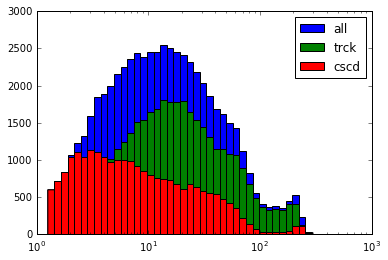

In [9]:
bins = np.logspace(1E-1, 3)
#bins = np.linspace(-1, 1)
logx = True
#logx = False

n_a, bins, patches = plt.hist(e_numu, bins=bins, label='all')
n_t, bins, patches = plt.hist(e_numu[track_mask], bins=bins, label='trck')
n_c, bins, patches = plt.hist(e_numu[~track_mask], bins=bins, label='cscd')
if logx: plt.semilogx()
plt.legend()

# Weighted distributions

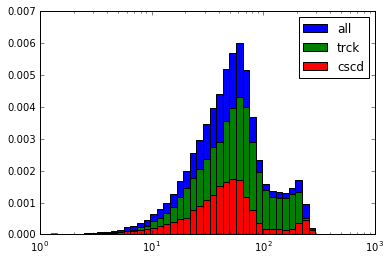

In [10]:
n_a, bins, patches = plt.hist(e_numu, weights=wei_numu, bins=bins, label='all')
n_t, bins, patches = plt.hist(e_numu[track_mask], weights=wei_numu[track_mask], bins=bins, label='trck')
n_c, bins, patches = plt.hist(e_numu[~track_mask], weights=wei_numu[~track_mask], bins=bins, label='cscd')
if logx: plt.semilogx()
plt.legend()

#### Cascade plot to match against

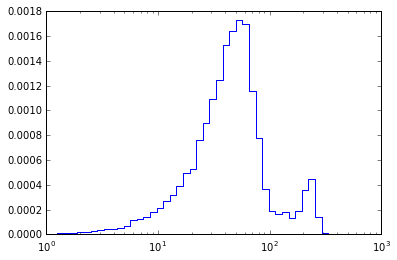

In [11]:
diff = n_a-n_t
diff = np.concatenate(([diff[0]], diff))
plt.plot(bins, diff, drawstyle='steps-pre')
if logx: plt.semilogx()

# Without weights

In [12]:
e_numu_trck = e_numu[track_mask]
e_numu_cscd = e_numu[~track_mask]
trck_hist, bin_edges = np.histogram(e_numu_trck, bins=bins)
cscd_hist, bin_edges = np.histogram(e_numu_cscd, bins=bins)
prob_trans_trck = np.ma.masked_invalid(trck_hist / (trck_hist.astype(float)+cscd_hist))
prob_trans_cscd = np.ma.masked_invalid(cscd_hist / (trck_hist.astype(float)+cscd_hist))

/common/users/mandalia/programs/Python-2.7.10/venv2_7/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in divide
/common/users/mandalia/programs/Python-2.7.10/venv2_7/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in divide


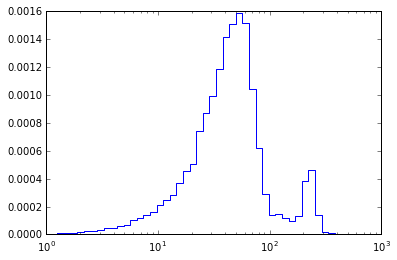

In [13]:
trck_map = n_a*prob_trans_cscd
trck_map = np.concatenate(([trck_map[0]], trck_map))
plt.plot(bins, trck_map, drawstyle='steps-pre')
if logx: plt.semilogx()

# With weights

In [14]:
e_numu_trck = e_numu[track_mask]
e_numu_cscd = e_numu[~track_mask]
trck_hist, bin_edges = np.histogram(e_numu_trck, weights=wei_numu[track_mask], bins=bins)
cscd_hist, bin_edges = np.histogram(e_numu_cscd, weights=wei_numu[~track_mask], bins=bins)

prob_trans_trck = np.ma.masked_invalid(trck_hist / (trck_hist+cscd_hist))
prob_trans_cscd = np.ma.masked_invalid(cscd_hist / (trck_hist+cscd_hist))

/common/users/mandalia/programs/Python-2.7.10/venv2_7/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in divide
/common/users/mandalia/programs/Python-2.7.10/venv2_7/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in divide


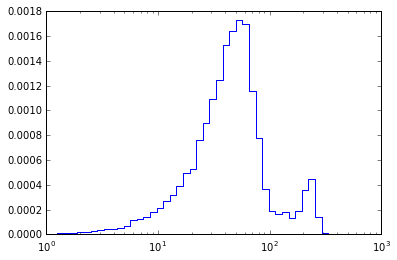

In [15]:
trck_map = n_a*prob_trans_cscd
trck_map = np.concatenate(([trck_map[0]], trck_map))
plt.plot(bins, trck_map, drawstyle='steps-pre')
if logx: plt.semilogx()